In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Check shape
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [5]:
# CNNs expect 3D images (height, width, channels), so we add a channel dimension. Then normalize pixel values to [0,1].

# Reshape: (28,28) → (28,28,1) because grayscale has 1 channel
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


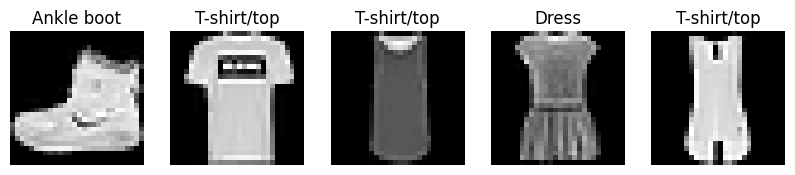

In [10]:
import matplotlib.pyplot as plt

# Class names for Fashion-MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")  # reshape back for display
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4279 - loss: 1.5867 - val_accuracy: 0.7437 - val_loss: 0.6923
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.7427 - loss: 0.6919 - val_accuracy: 0.7582 - val_loss: 0.6276
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7677 - loss: 0.6184 - val_accuracy: 0.7853 - val_loss: 0.5698
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.7849 - loss: 0.5712 - val_accuracy: 0.7961 - val_loss: 0.5362
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.8042 - loss: 0.5264 - val_accuracy: 0.8132 - val_loss: 0.5047
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8179 - loss: 0.4960 - val_accuracy: 0.8179 - val_loss: 0.4866
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8293 - loss: 0.4605 - val_accuracy: 0.8371 - val_loss: 0.4525
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.8330 - loss: 0.4495 - 

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.8279 - loss: 0.4677
Test accuracy: 0.8278999924659729


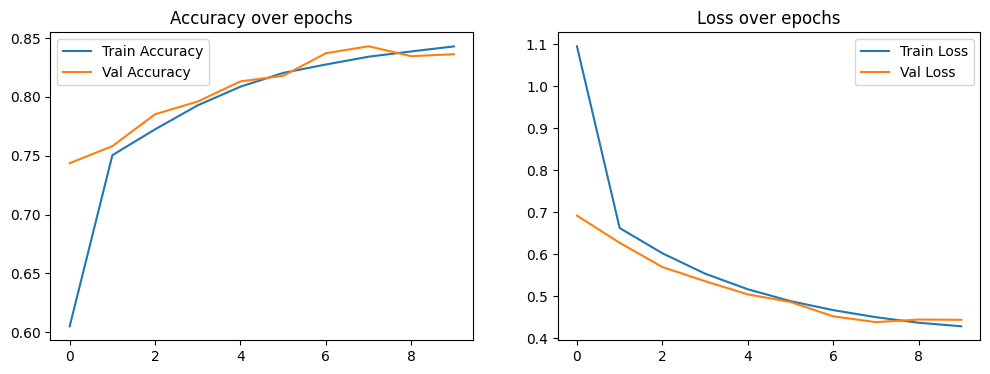

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over epochs")

plt.show()